**Lets Download Some Libraries...****

In [1]:
!pip install sentence_transformers
!pip install ftfy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=809ecc70c68ffcbce3d11151cc6aed7c06d34968ae10e9020af9980a4a1b5170
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.8 MB/s eta 0:00:00


*Importing some modules...*

In [2]:
import glob
import torch
import os
import time
import json
import pickle
import os.path
import urllib

from PIL import Image
from IPython.display import display
from IPython.display import Image as IPDImage
from tqdm.autonotebook import tqdm
from zipfile import ZipFile as ZP

from sentence_transformers import SentenceTransformer, util

/tmp/ipykernel_23/3283817365.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Checking System Version

In [3]:
import sys
sys.version


'3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]'

Checking Time of Performing Experiment

In [4]:
import datetime
Current_Date_Formatted = datetime.datetime.today().strftime ('%d-%b-%Y')
print ('Current Date: ' + str(Current_Date_Formatted))

Current Date: 28-Jul-2023


Downloading Bundled Images from Retowski's Github repo

In [5]:
download_url = "https://github.com/retkowsky/visual_search_openai_clip/raw/main/images.zip"
zip_file = "images.zip"

t1 = time.time()
print("Downloading the images zip file...")
urllib.request.urlretrieve(download_url, filename=zip_file)
print("\nDone in", round(time.time() - t1, 2), "secs")


Done in 2.02 secs


In [6]:
!ls *.zip -lh

-rw-r--r-- 1 root root 25M Jul 28 16:58 images.zip


In [7]:
img_folder = "images"

In [8]:
t1 = time.time()

if not os.path.exists(img_folder):
    try:
        with ZP(zip_file, 'r') as zip:
            print("Unzipping the zip file:", zip_file)
            zip.extractall()
        print("Done")
    
    except:
        print("Error")
    
    print("\nDeleting the zip file:", zip_file)
    os.remove(zip_file)
    print("Done")

    print("\nFull process done in", round((time.time() - t1) / 60, 2), "min")

Unzipping the zip file: images.zip
Done

Deleting the zip file: images.zip
Done

Full process done in 0.0 min


In [9]:
nbfiles = sum(len(files) for _, _, files in os.walk(img_folder))
print("Number of files in the directory", img_folder, "=", nbfiles)

Number of files in the directory images = 1006


In [10]:
clipmodel = 'clip-ViT-B-32'

model = SentenceTransformer(clipmodel)
print("We will use model:", clipmodel)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

We will use model: clip-ViT-B-32


In [11]:
imageslist = [file for file in glob.glob(img_folder + '/*.*') 
              if file.endswith(('jpeg', 'png', 'jpg', 'JPEG', 'PNG', 'JPG'))]

In [12]:
imageslist

['images/img (1002).jpg',
 'images/img (293).jpg',
 'images/img (291).jpg',
 'images/img (229).jpg',
 'images/img (391).jpg',
 'images/img (619).jpg',
 'images/img (271).jpg',
 'images/img (592).jpg',
 'images/img (994).jpg',
 'images/img (789).jpg',
 'images/img (741).jpg',
 'images/img (43).jpg',
 'images/img (642).jpg',
 'images/img (24).jpg',
 'images/img (50).jpg',
 'images/img (698).jpg',
 'images/img (277).jpg',
 'images/img (944).jpg',
 'images/img (840).jpg',
 'images/img (110).jpg',
 'images/img (176).jpg',
 'images/img (954).jpg',
 'images/img (281).jpg',
 'images/img (938).jpg',
 'images/img (51).jpg',
 'images/img (584).jpg',
 'images/img (527).jpg',
 'images/img (143).jpg',
 'images/img (561).jpg',
 'images/img (918).jpg',
 'images/img (160).jpg',
 'images/img (139).jpg',
 'images/img (366).jpg',
 'images/img (492).jpg',
 'images/img (240).jpg',
 'images/img (964).jpg',
 'images/img (585).jpg',
 'images/img (818).jpg',
 'images/img (204).jpg',
 'images/img (433).jpg',
 'i

In [13]:
# Name of the model to create or to use
mymodel = "mymodelv1.pkl"


In [14]:
if os.path.exists(mymodel):
    try:
        print("Loading pkl file:", mymodel) # We can load the pkl file

        with open(mymodel, 'rb') as f:
            image_emb = pickle.load(f)

        print("Model embedding loaded!")

    except:
        print("Error when loading the pkl file", mymodel)

else:
    t1 = time.time()
    
    try:
        print("Processing images...") # We are going to encode each image file
        image_emb = model.encode([Image.open(filename) 
                                  for filename in imageslist],
                                 batch_size=64,
                                 convert_to_tensor=True,
                                 show_progress_bar=True)

        print("Saving model into", mymodel) # we can save the embedded results
        with open(mymodel,'wb') as f:
            pickle.dump(image_emb, f)

        print("\nDone in", round((time.time() - t1) / 60, 2), "min.")
        print("Time for processing 1 image =", round((time.time() - t1) / len(imageslist), 5), "seconds.")

    except:
        print('Error during the processing of the images')

Processing images...


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Saving model into mymodelv1.pkl

Done in 0.38 min.
Time for processing 1 image = 0.02272 seconds.


In [15]:
!ls *.pkl -lh


-rw-r--r-- 1 root root 2.0M Jul 28 16:59 mymodelv1.pkl


In [16]:
def search(query, topn=3, size=250):

    t1 = time.time()

    # First, we encode the query 
    # (which can either be an image or a text string)
    query_emb = model.encode([query], 
                             convert_to_tensor=True, 
                             show_progress_bar=False)

    # Then, we use the util.semantic_search function
    #, which computes the cosine-similarity
    # between the query embedding and all image embeddings.
    results = util.semantic_search(query_emb, 
                                   image_emb, 
                                   top_k=topn)[0]

    print("Your query:", query)
    print("\nResults:\n")

    nbimages = 1

    for result in results:
        print(nbimages, "- Catalog image ID:", 
              imageslist[result['corpus_id']], 
              " with score =", round(result['score'], 5), "\n")
        
        display(IPDImage(imageslist[result['corpus_id']], 
                         width=size))

        nbimages += 1

    print("\nDone in", round(time.time() - t1, 5), "secs")

    return results

In [17]:
query = 'green car'

query_emb = model.encode([query], 
                         convert_to_tensor=True, 
                         show_progress_bar=False)

results = util.semantic_search(query_emb, 
                               image_emb, 
                               top_k=3)[0]

print("Results:")
print(json.dumps(results, indent=3))

Results:
[
   {
      "corpus_id": 300,
      "score": 0.29827985167503357
   },
   {
      "corpus_id": 347,
      "score": 0.2869340777397156
   },
   {
      "corpus_id": 786,
      "score": 0.2866456210613251
   }
]


Your query: Tour Eiffel

Results:

1 - Catalog image ID: images/img (974).jpg  with score = 0.31114 



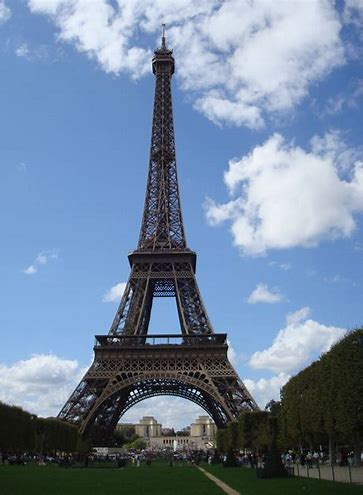

2 - Catalog image ID: images/img (991).jpg  with score = 0.30522 



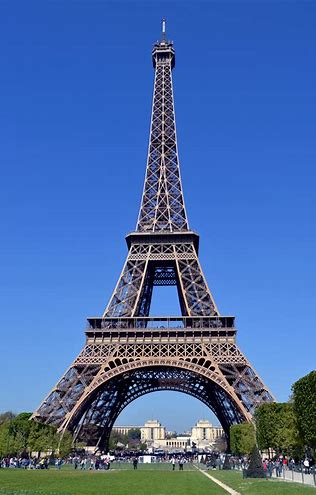

3 - Catalog image ID: images/img (992).jpg  with score = 0.30504 



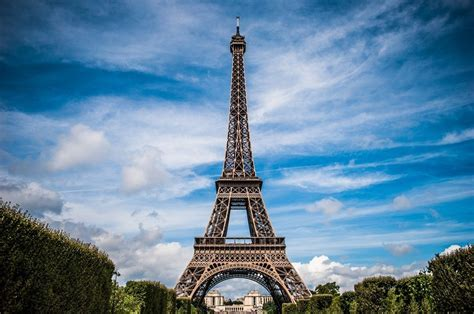


Done in 0.02535 secs


[{'corpus_id': 717, 'score': 0.3111434876918793},
 {'corpus_id': 669, 'score': 0.3052155673503876},
 {'corpus_id': 497, 'score': 0.30504462122917175}]

In [18]:
search("Tour Eiffel")

Your query: Arc de triomphe

Results:

1 - Catalog image ID: images/img (979).jpg  with score = 0.33682 



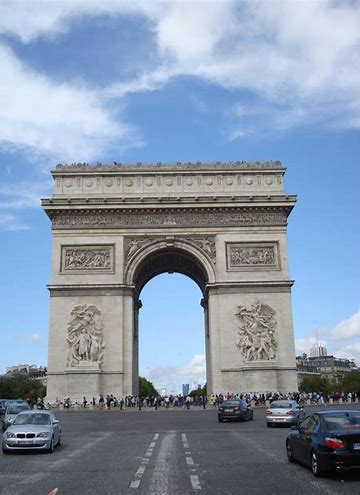

2 - Catalog image ID: images/img (12).jpg  with score = 0.32178 



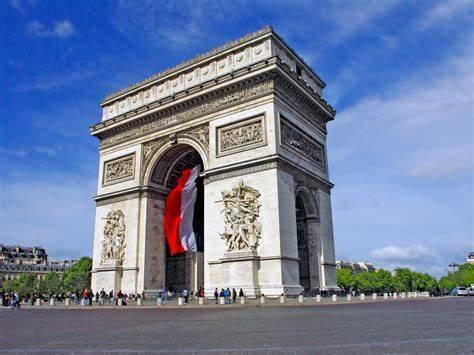

3 - Catalog image ID: images/img (972).jpg  with score = 0.31789 



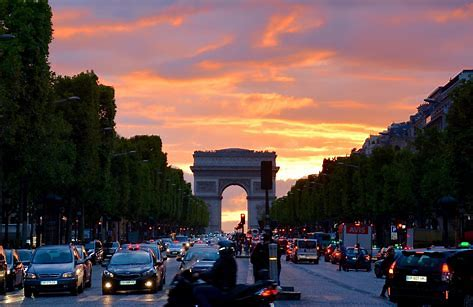


Done in 0.02417 secs


[{'corpus_id': 421, 'score': 0.33681586384773254},
 {'corpus_id': 693, 'score': 0.32177650928497314},
 {'corpus_id': 575, 'score': 0.31788718700408936}]

In [19]:
search("Arc de triomphe")


Your query: Night in Paris

Results:

1 - Catalog image ID: images/img (989).jpg  with score = 0.30085 



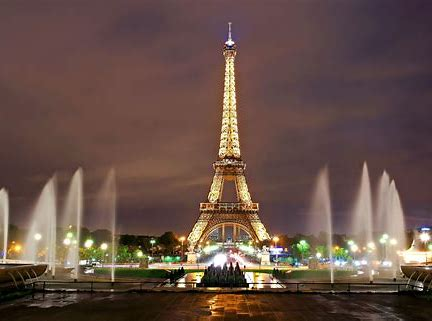

2 - Catalog image ID: images/img (993).jpg  with score = 0.287 



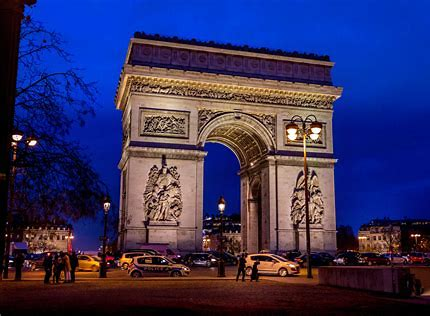

3 - Catalog image ID: images/img (981).jpg  with score = 0.27647 



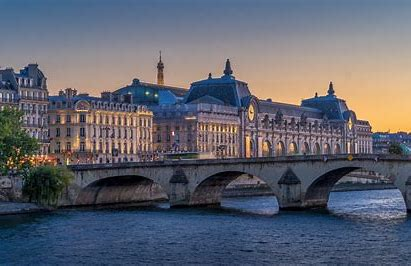


Done in 0.02434 secs


[{'corpus_id': 594, 'score': 0.3008500337600708},
 {'corpus_id': 97, 'score': 0.28700265288352966},
 {'corpus_id': 220, 'score': 0.27647462487220764}]

In [20]:
search("Night in Paris")

Your query: Red light paris

Results:

1 - Catalog image ID: images/img (972).jpg  with score = 0.26226 



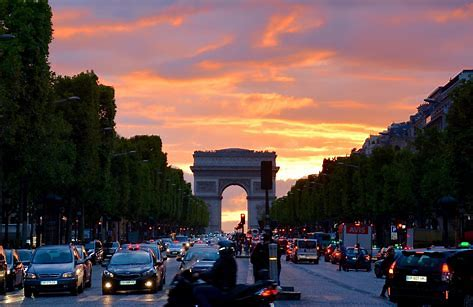

2 - Catalog image ID: images/img (32).jpg  with score = 0.25842 



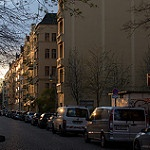

3 - Catalog image ID: images/img (989).jpg  with score = 0.25736 



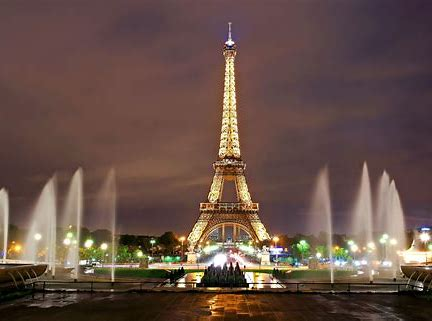


Done in 0.02376 secs


[{'corpus_id': 575, 'score': 0.2622637450695038},
 {'corpus_id': 185, 'score': 0.25842177867889404},
 {'corpus_id': 594, 'score': 0.2573620676994324}]

In [21]:
search("Red light paris")

Your query: Femme

Results:

1 - Catalog image ID: images/img (773).jpg  with score = 0.25303 



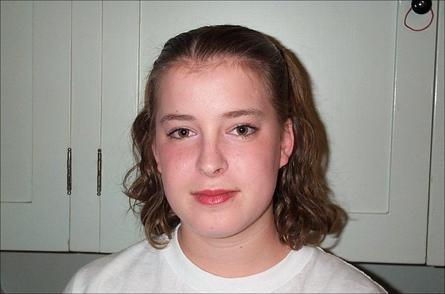

2 - Catalog image ID: images/img (683).jpg  with score = 0.25126 



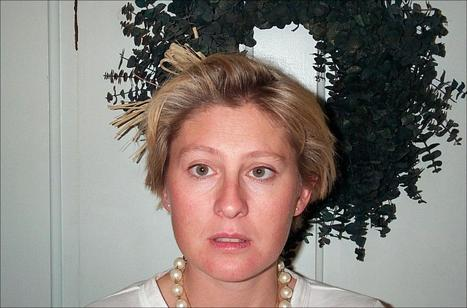

3 - Catalog image ID: images/img (833).jpg  with score = 0.25075 



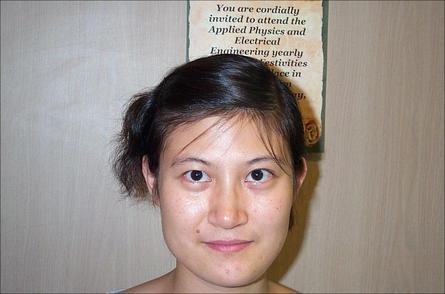


Done in 0.02567 secs


[{'corpus_id': 363, 'score': 0.25303128361701965},
 {'corpus_id': 1001, 'score': 0.25126126408576965},
 {'corpus_id': 175, 'score': 0.25075143575668335}]

In [22]:
search("Femme")

In [23]:
download_url = "https://www.marinehome.fr/wp-content/uploads/2019/07/5067_n9qm1fmppd_2920.jpg"
reference_image = "download2.jpg"
urllib.request.urlretrieve(download_url, filename=reference_image)

('download2.jpg', <http.client.HTTPMessage at 0x7c164403f910>)

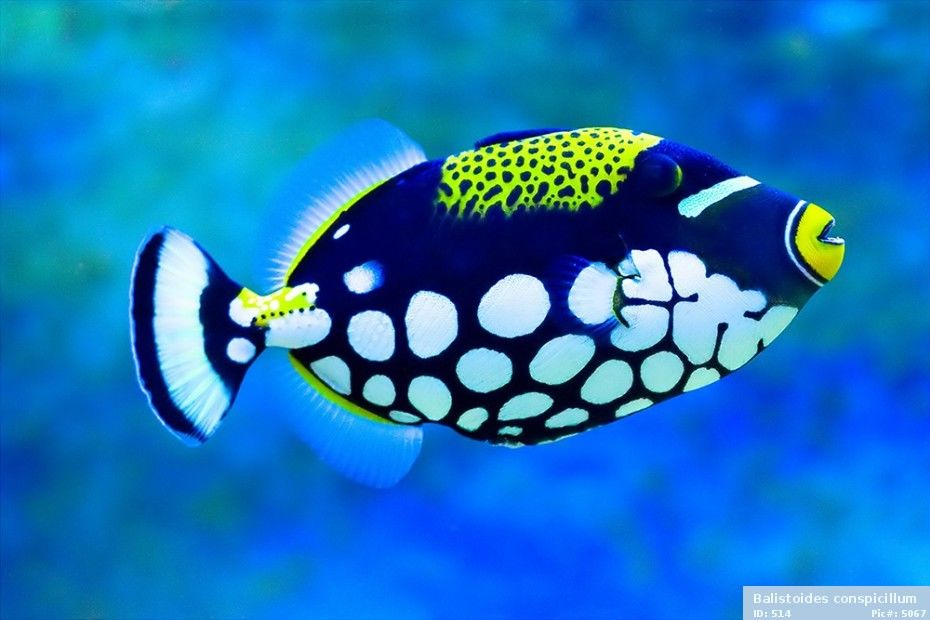

In [24]:
%matplotlib inline
IPDImage(filename=reference_image, width=250) 

Your query: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=930x620 at 0x7C164426FFA0>

Results:

1 - Catalog image ID: images/img (146).jpg  with score = 0.88034 



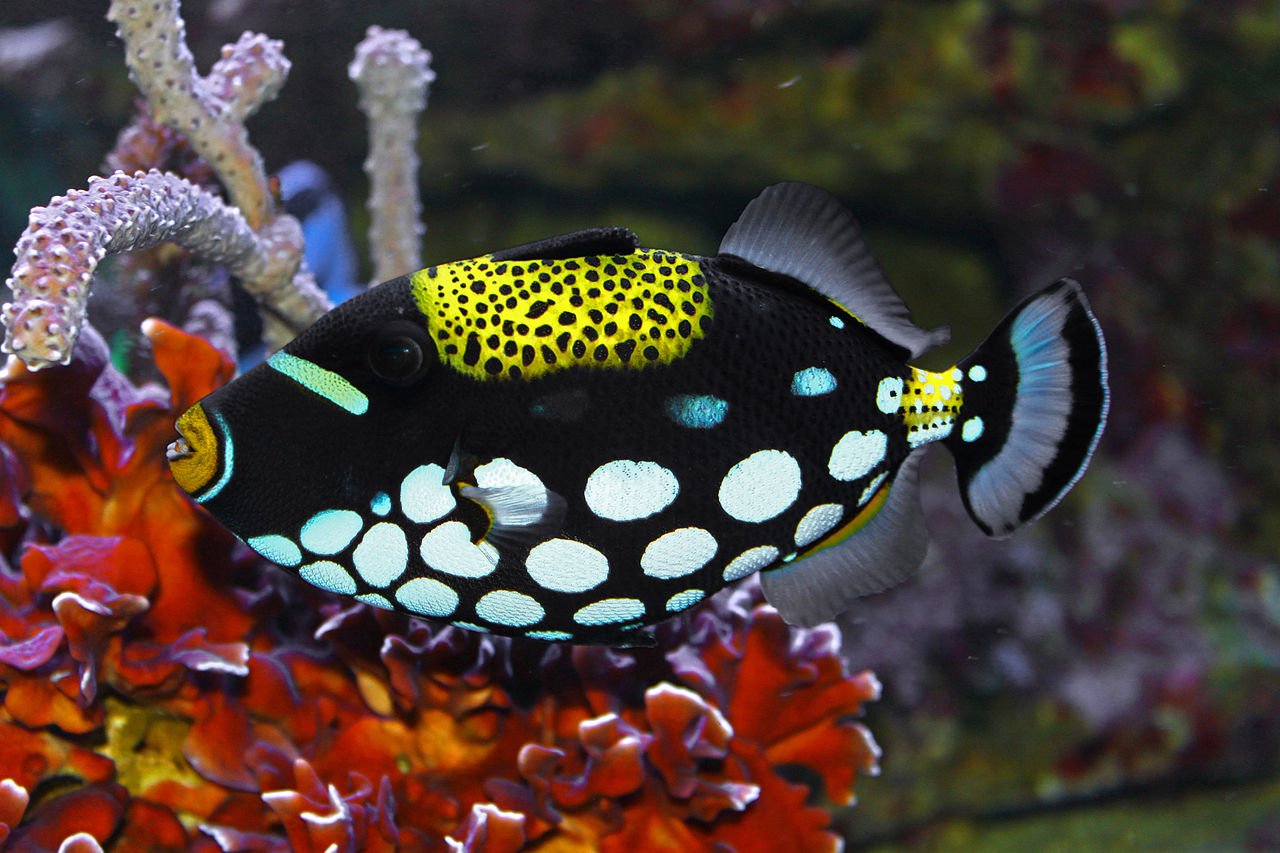

2 - Catalog image ID: images/img (141).jpg  with score = 0.87843 



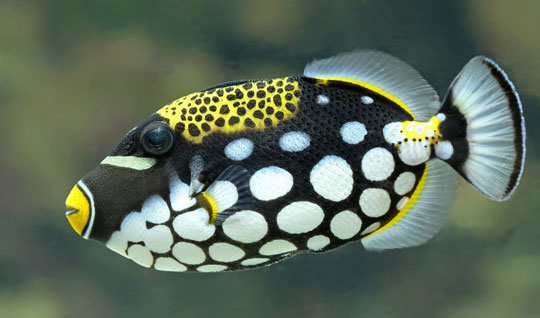

3 - Catalog image ID: images/img (143).jpg  with score = 0.8597 



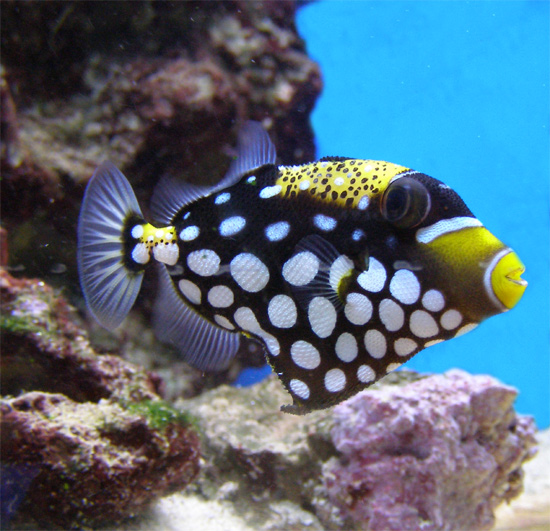

4 - Catalog image ID: images/img (145).jpg  with score = 0.85349 



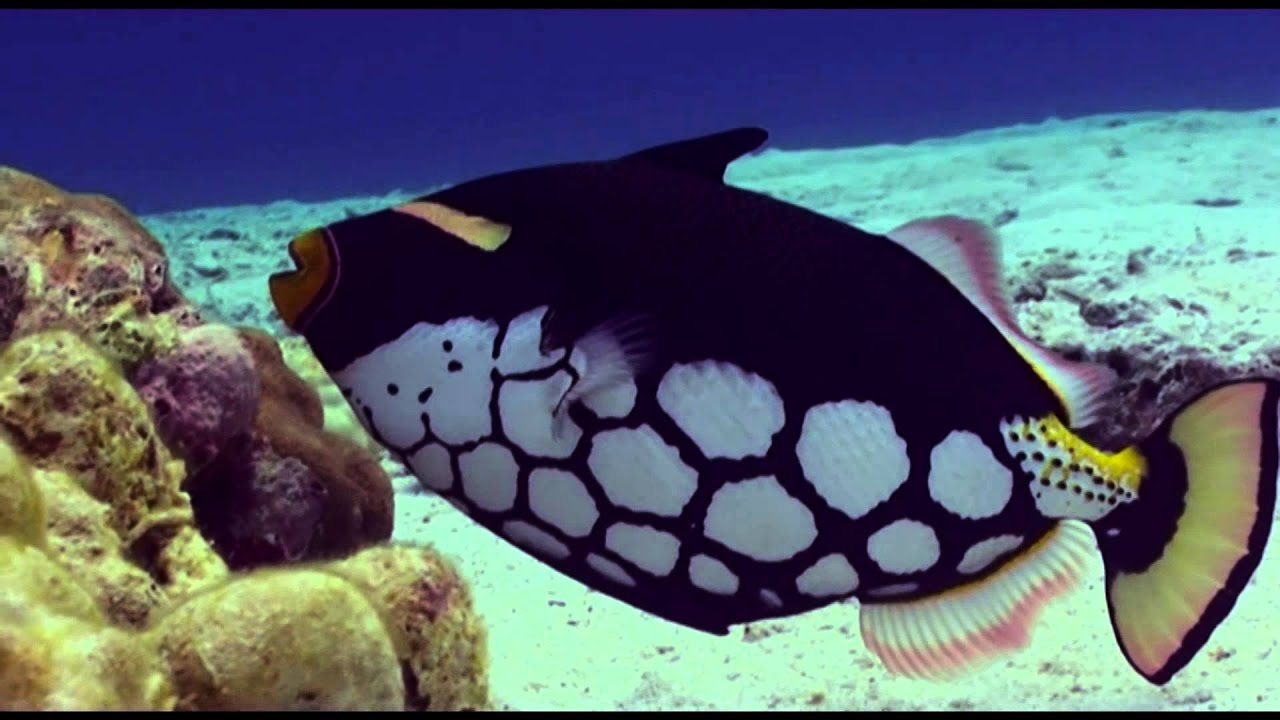

5 - Catalog image ID: images/img (140).jpg  with score = 0.85025 



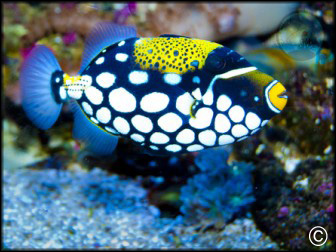


Done in 0.08076 secs


[{'corpus_id': 898, 'score': 0.8803408145904541},
 {'corpus_id': 289, 'score': 0.8784335851669312},
 {'corpus_id': 27, 'score': 0.8597043752670288},
 {'corpus_id': 877, 'score': 0.8534902930259705},
 {'corpus_id': 886, 'score': 0.8502525091171265}]

In [25]:
search(Image.open(reference_image), topn=5)
